
# Dive Into Internet Advertisements Data Set.

### CRISP-DM Process:

**Business Understanding:** Using given dataset Analyse the data & with better knowledge of the data,Build a model to predict whether an image is an advertisement ("ad") or not ("nonad") and also figure out some insights in data.

motivation behind this project was to answer the below question by understanding and exploring data:

1. How to build vary basic simple Prediction model, which will identify Images on website, is AD or (Not AD)
2. We will also explore the challenges associated with building Model
3. How we can tackle those challenges?


**Data Understanding:** Internet Advertisements Data Set consists total 3279 Records(2821 nonads, 458 ads). Datasets were investigated before we do any preprocessing.

**Prepare Data:** This Includes data cleaning, filling NAN value, one-hot encoding preprocessing. Please refer to Preprocessing for detail.

**Data Modeling:** Used GridSearch with 5 folds validation to find best parameter for Classifier. How to handle unbalanced data discussed Please refer to Training & Testing for detail. You can try with cv's.

**Evaluate the Results:**
Result and discussion are published in https://medium.com/@shihaowen/dive-into-boston-and-seattle-airbnb-data-b4a9e79b740c.

 ------------------------------------------------------------------------------------------------------------------------------

`VERSION OF PYTHON you are using when submitting this notebook. `

In [1]:
import sys;
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\vinayak\Anaconda2.7\envs\py36\python.exe
3.6.8 |Anaconda, Inc.| (default, Feb 11 2019, 15:03:47) [MSC v.1915 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


------------------------------------------------------------------------------------------------------------------------------

## Exploring the Data

#### Run the below code to load necessary Python libraries

In [2]:
# import libraries here; add more as necessary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib import gridspec;
import time;
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             classification_report, confusion_matrix,roc_curve,auc)
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# magic word for producing visualizations in notebook
%matplotlib inline

#### Load Data

In [3]:
# Load in the Internet Advertisements Data.
data = pd.read_csv('ad.csv',header=None,low_memory=False);

## Data Preparation & Processing

In [4]:
print("------------------------------------");
print("date set consist of  :");
print("------------------------------------");
print("Number of rows       :",data.shape[0]);
print("Number of columns    :",data.shape[1]);
print("------------------------------------");
print("top rows             :");
print("------------------------------------\n");
print(data.head())
print("------------------------------------");
print("bottom rows             :");
print("------------------------------------\n");
print(data.tail())

------------------------------------
date set consist of  :
------------------------------------
Number of rows       : 3279
Number of columns    : 1559
------------------------------------
top rows             :
------------------------------------

   0     1       2    3     4     5     6     7     8     9     ...  1549  \
0   125   125     1.0    1     0     0     0     0     0     0  ...     0   
1    57   468  8.2105    1     0     0     0     0     0     0  ...     0   
2    33   230  6.9696    1     0     0     0     0     0     0  ...     0   
3    60   468     7.8    1     0     0     0     0     0     0  ...     0   
4    60   468     7.8    1     0     0     0     0     0     0  ...     0   

   1550  1551  1552  1553  1554  1555  1556  1557  1558  
0     0     0     0     0     0     0     0     0   ad.  
1     0     0     0     0     0     0     0     0   ad.  
2     0     0     0     0     0     0     0     0   ad.  
3     0     0     0     0     0     0     0     0   ad

**Features**

Number of features: 1558 (3 continous; others binary);
Number of Records: 3279 (2820 nonads, 459 ads)

* height  & width features  Contains width X height of the image on the web page
* ratio contains continuous features(ratio of Height & width)
* local is categorical features Indicated whether the domain of the web page is the same as the domain of the image;
* 457 Categorical features from url terms.
* 495 Categorical features from origurl terms
* 472 Categorical features from ancurl terms
* 111 Categorical features from alt terms
* 19  Categorical features from caption terms
* 1558 (Total):3(height  & width & ratio)+1(local)+457(url terms)+ 495(origurl terms)+472(ancurl terms)+111(alt terms)+19(caption terms)

**Target**
* Binary Categorical feature There are two classes: ad (ad image) and nonad (non-ad image).

#### Lets rename columns with meaningfull names.

In [5]:

#rename the coloumns first,second,third and last(target) colmns respectively
data.rename(columns={0:'height', 1:'width', 2:'ratio',3:'local', 1558:'target'}, inplace=True)

#get the count of target feature
print(data['target'].value_counts())

nonad.    2820
ad.        459
Name: target, dtype: int64


As Preprocessing Steps,lets identify the columns with missing information and lets Impute these missing values.

Four Features Consist Missing Values: **{height, width, ratio and local}** 

Looking at top 5 and bottom five data we can see height, width and ratio columns filled with `'?'` and this `'question mark'` indicates that this value is missing or unknown .Lets fill the values with nan values and re-check how many missing columns we can find. 

### Lets Convert Target Categorical Variable to (0,1) with LabelEncoder
Where 
* 0: Image with Ads
* 1: Image with No Ads

In [6]:
#print(data.dtypes)
label_encoder=LabelEncoder()
data['target']=label_encoder.fit_transform(data['target'])
data.columns;
data.tail()

,height,width,ratio,local,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,target
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3278,40,40,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


####  Lets fill '?'  with NAN

In [7]:
data= data.applymap(lambda x:np.nan if isinstance(x,str) and '?' in x else x)

In [8]:
#look at botttom five samples
data.tail()

,height,width,ratio,local,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,target
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3277,NaN,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3278,40,40,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


 #### Lets re-check how many missing columns we can find.

#### Missing DATA:
    
* First three continous variables (Height,Width,Ratio) having Missing data around 28%
* Local Categorical Variable having around 0.46% of missing Data

,missing_count,missing_ratio
height,903,27.538884
width,901,27.477890
ratio,910,27.752364
local,15,0.457457


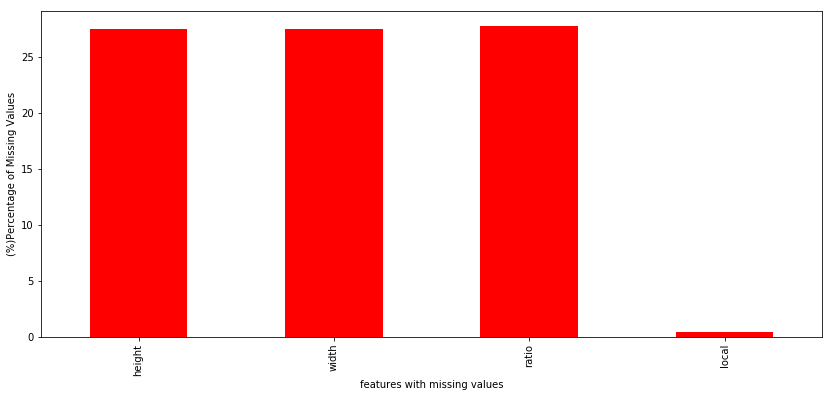

In [9]:
missing_count=pd.DataFrame(data.iloc[:,:].isnull().sum(),columns=['missing_count'])
missing_ratio=pd.DataFrame((data.isnull().sum()/len(data))*100,columns=['missing_ratio'])
missing_data=pd.concat([missing_count,missing_ratio],axis=1)

missing=missing_data[missing_data.missing_count>0]

plt.figure(figsize=(14,6))
missing.missing_ratio.plot(kind='bar',color='r')
#missing.missing_count.plot(kind='bar',color='g')
plt.xlabel('features with missing values')
plt.ylabel('(%)Percentage of Missing Values')
null_columns=missing.index.tolist()
missing

### Lets plot pair plot to know relation between features(Contains Missing Values)

['height', 'width', 'ratio', 'local', 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 4 columns):
height    2376 non-null float64
width     2378 non-null float64
ratio     2369 non-null float64
local     3264 non-null float64
dtypes: float64(4)
memory usage: 102.5 KB


C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to target
dtypes: float64(4), int64(1555)
memory usage: 39.0 MB
None
height    float64
width     float64
ratio     float64
local     float64
4           int64
5           int64
dtype: object
1554      int64
1555      int64
1556      int64
1557      int64
target    int64
dtype: object


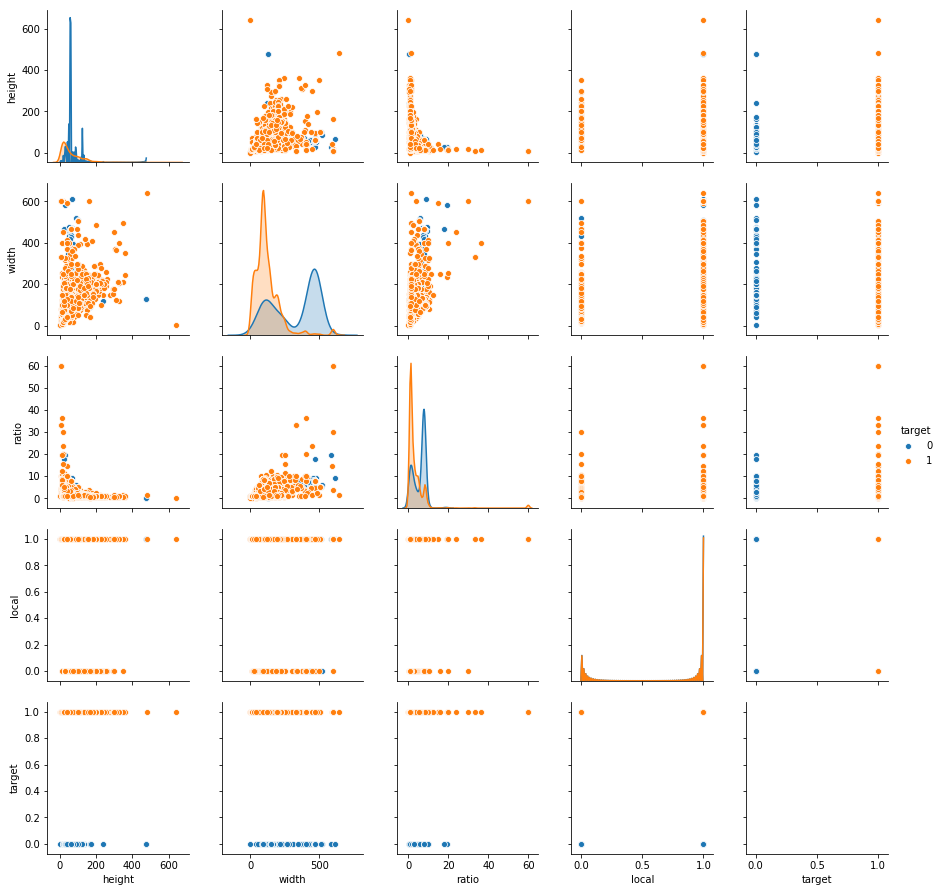

In [10]:
##Create columns which contains Null Values for Visualization.
columns_for_visualization= null_columns + ['target']
print(columns_for_visualization)

data[null_columns]=data[null_columns].astype('float')

data[null_columns].info()
sns.pairplot(data[columns_for_visualization],hue='target')
print(data.info());
print(data.dtypes[:6])
print(data.dtypes[-5:])

### Lets Impute Categorical Missing Values with mode and continous variable with median


In [11]:
#local is categorical variable updated with mode
data['local'].fillna(data['local'].mode(), inplace = True);

#other variables are Continous variable updated with median
data.fillna(data.median(), inplace = True);

In [12]:
print(data.describe())

            height        width        ratio        local            4  \
count  3279.000000  3279.000000  3279.000000  3279.000000  3279.000000   
mean     60.435804   142.885026     3.409648     0.768222     0.004270   
std      47.064669   112.564585     5.199722     0.422032     0.065212   
min       1.000000     1.000000     0.001500     0.000000     0.000000   
25%      32.500000    90.000000     1.279400     1.000000     0.000000   
50%      51.000000   110.000000     2.102000     1.000000     0.000000   
75%      61.000000   144.000000     3.900000     1.000000     0.000000   
max     640.000000   640.000000    60.000000     1.000000     1.000000   

                 5            6            7            8            9  ...  \
count  3279.000000  3279.000000  3279.000000  3279.000000  3279.000000  ...   
mean      0.011589     0.004575     0.003355     0.003965     0.011589  ...   
std       0.107042     0.067491     0.057831     0.062850     0.107042  ...   
min       0.00000


### Visualization 

#### Lets plot pair plot to know relation between features (After Imputation of Missing Values)

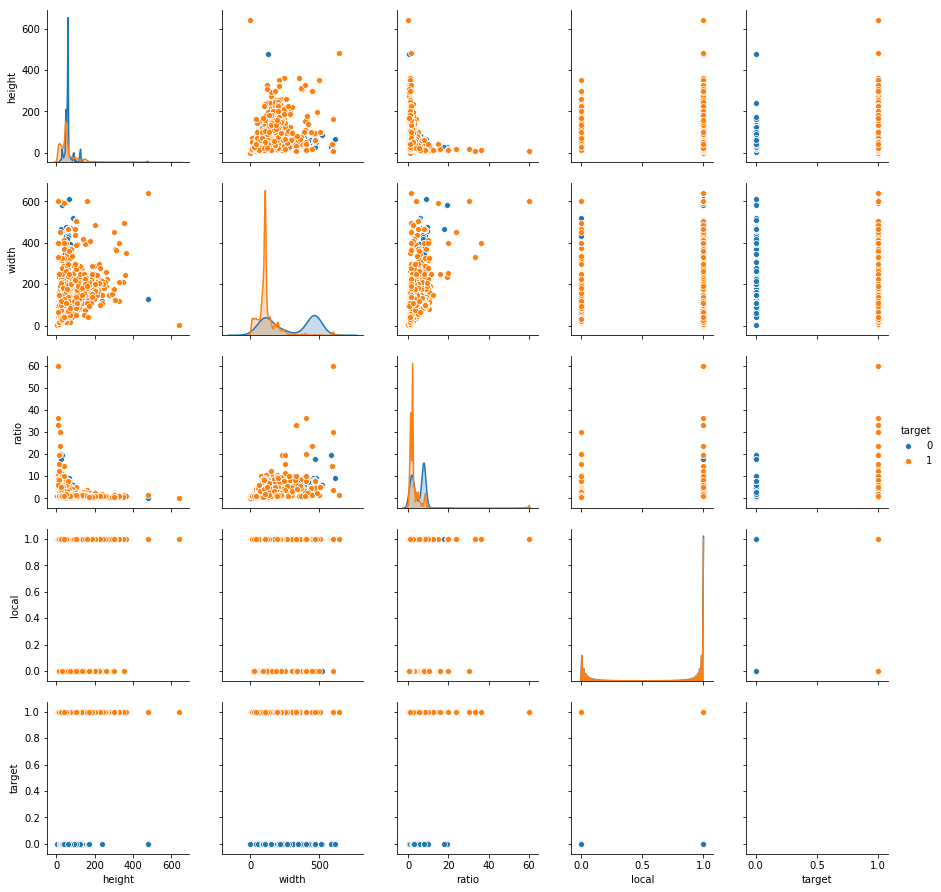

In [13]:
#After Imputuation distributino -Pairplot

data[columns_for_visualization].describe()
sns.pairplot(data[columns_for_visualization],hue='target')


#### Analaysis of Class/Target  Variable 

Size: 3279
No Ads percentage: [ 2820 ] 0.8600182982616651
Ads percentage: [ 459 ] 0.13998170173833485


Text(0.5, 1.0, 'Class Distributions \n (0: ad || 1: nonad)')

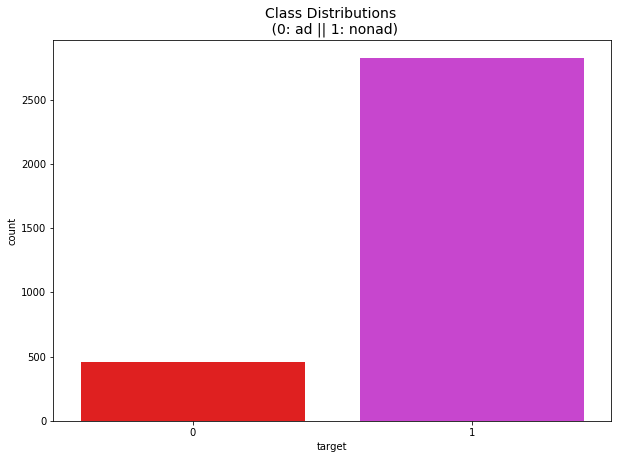

In [14]:

print('Size:',data['target'].count())
print("No Ads percentage:","[",data['target'].value_counts()[1],"]",
      data['target'].value_counts()[1]/data['target'].count())
print("Ads percentage:","[",data['target'].value_counts()[0],"]",
      data['target'].value_counts()[0]/data['target'].count())

plt.figure(figsize=(10,7))
colors=['#FF0000','#DB2FE5']
sns.countplot('target', data=data,palette=colors)
plt.title('Class Distributions \n (0: ad || 1: nonad)', fontsize=14)



In [15]:
#function to draw mulitvariable plots
#added docstirng to the function
def draw_multivarient_plot(data, rows, cols, plot_type):
    '''
    Input: data=DataFrame 
           rows=  Number of rows plot will be alligned to 
           cols=  Number of columns plot wil be alligned to
           plot_type= choose from Violin,box,Bar,strip to plot
    Ouput :
           Visualization plots for each plot_type
           
    '''
    column_names=data.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(16,10))

    counter=0
    for i in range(rows):
        for j in range(cols):
             
            if counter>(number_of_column-1):
                break
            if 'violin' in plot_type:
                sns.violinplot(x='target', y=column_names[counter],data=data, ax=axarr[i][j],hue='target')
            elif 'box'in plot_type :
                sns.boxplot(x='target', y=column_names[counter],data=data, ax=axarr[i][j],hue='target')
            elif 'bar' in plot_type:
                sns.barplot(x='target',y=column_names[counter],data=data, ax=axarr[i][j],hue='target')
            elif 'strip' in plot_type:   
                sns.stripplot(x='target',y=column_names[counter],data=data, ax=axarr[i][j],hue='target')
                
            counter+=1

#### Strip plot helps us to understand how classes are in frequency


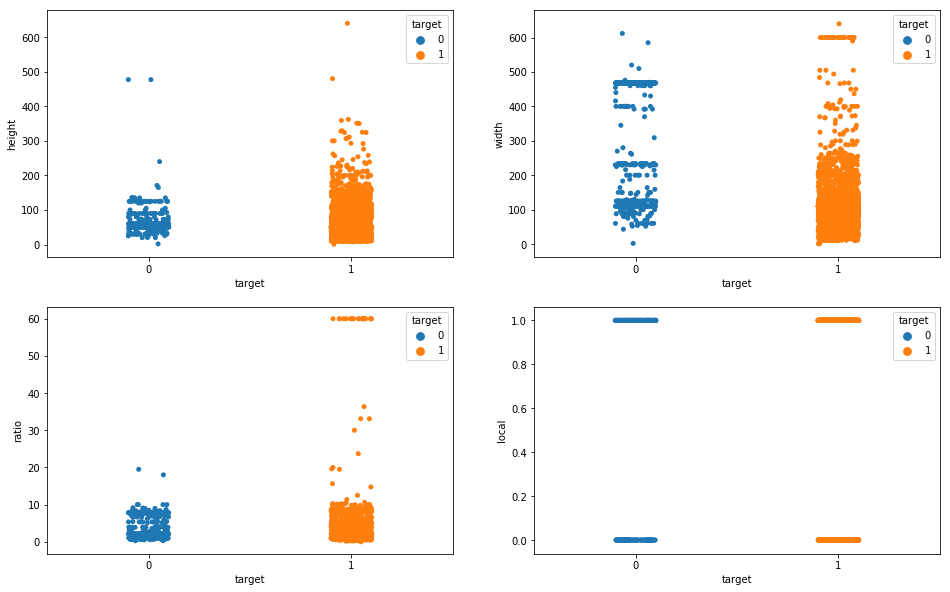

In [16]:
draw_multivarient_plot(data[columns_for_visualization],rows=2,cols=2,plot_type="strip");

#### Bar plot  helps us to understand distribution of calss(Target) with respect to features.

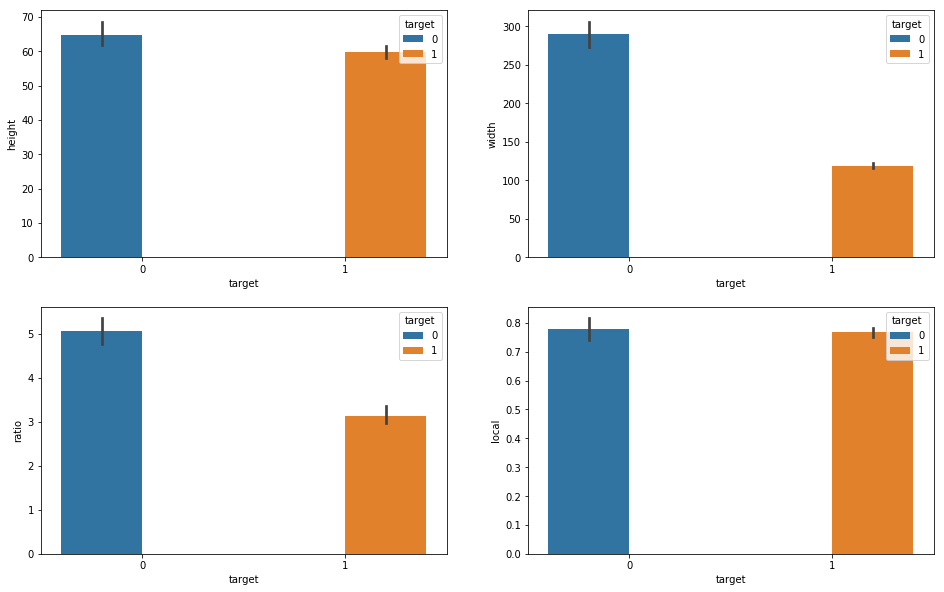

In [17]:
draw_multivarient_plot(data[columns_for_visualization],rows=2,cols=2,plot_type="bar");

 #### Boxplot helps us to see the difference in quartiles,mean and the outliers

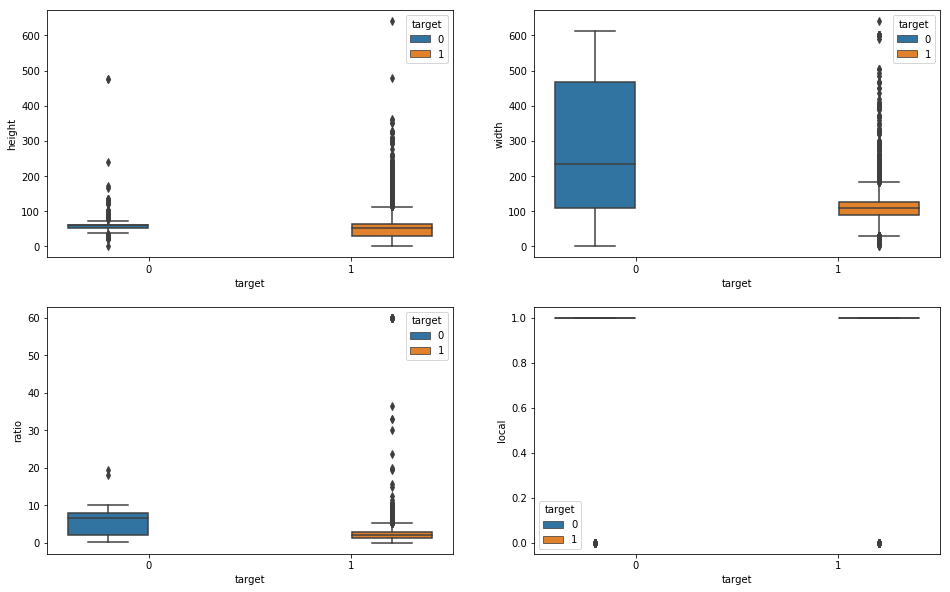

In [18]:
draw_multivarient_plot(data[columns_for_visualization],rows=2,cols=2,plot_type="box")


#### Violin Plot helps us to uderstand the probability density of the data at different values similar to box plot

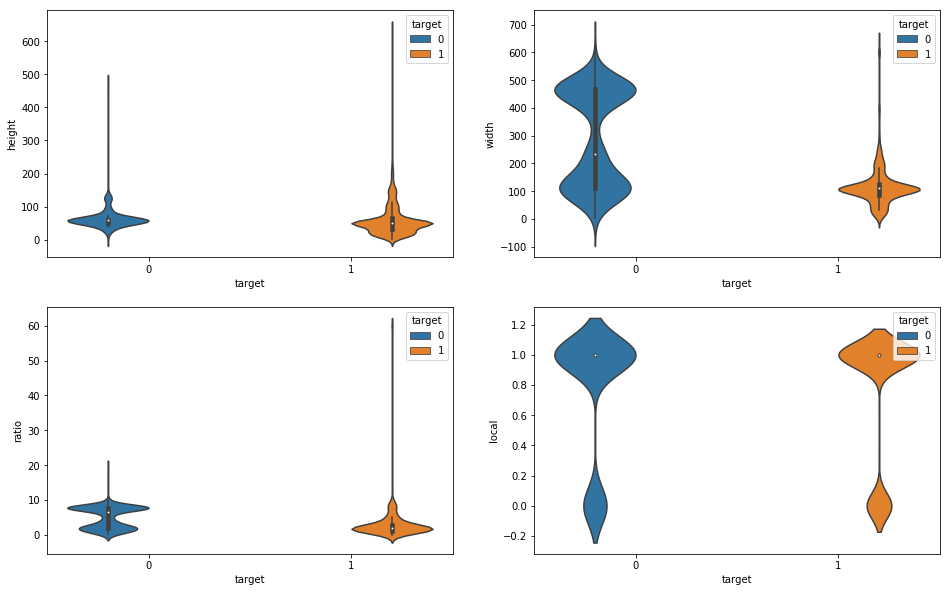

In [19]:
draw_multivarient_plot(data[columns_for_visualization],rows=2,cols=2,plot_type="violin");


 #### Correlation Matrix helps us to understand collinearity of features.

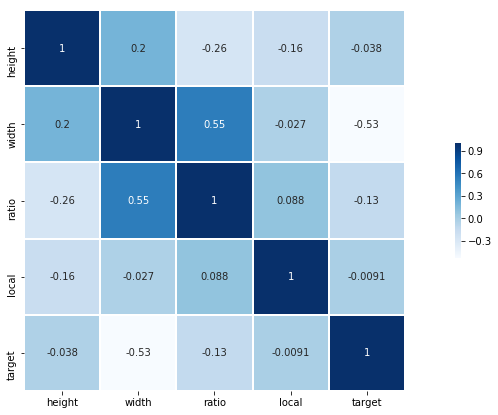

In [20]:
fig, ax = plt.subplots(figsize=(18,7))
sns.heatmap(data[columns_for_visualization].corr(), 
            cmap = 'Blues',linewidth=1, square=True,
            cbar_kws={'shrink': .3}, annot=True, 
            annot_kws={'fontsize': 10})


#### Standardise the data

In [21]:
#Scale the data using Standard Scaler
x = data[data.columns[:-1]]

#Using Statnderd scaler to standardise the data
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
y=data['target']
print(y.unique())

C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


[0 1]


C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### lets split the data to train and test

In [22]:
X_train, X_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.1, random_state=42);

# Class balance in train group
print("\nTRAIN GROUP")
print('Size:',y_train.count())
print("No Ads percentage:",
      y_train.value_counts()[1]/y_train.count())
print("Ads percentage:",
      y_train.value_counts()[0]/y_train.count())


# Class balance in test group
print("TEST GROUP")
print('Size:',y_test.count())
print("No Ads percentage:",
      y_test.value_counts()[1]/y_test.count())
print("Ads percentage:",
      y_test.value_counts()[0]/y_test.count())



TRAIN GROUP
Size: 2951
No Ads percentage: 0.8671636733310742
Ads percentage: 0.13283632666892578
TEST GROUP
Size: 328
No Ads percentage: 0.7957317073170732
Ads percentage: 0.20426829268292682


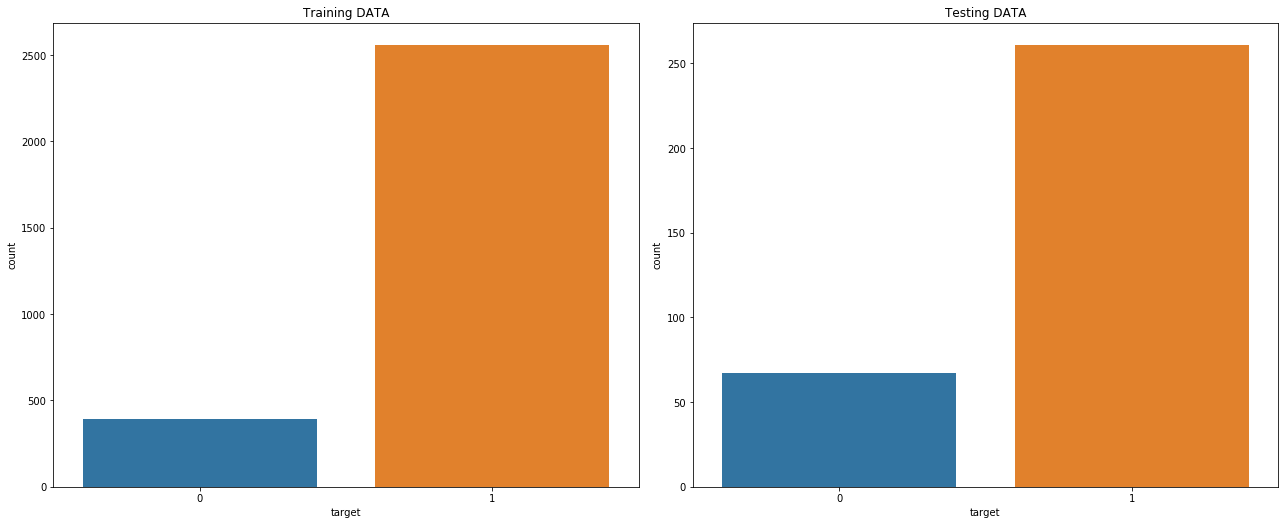

In [23]:
#plot for train & test class
fig = plt.figure(figsize = (18,14)) 

ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)
ax1.set_title("Training DATA");
sns.countplot(y_train,label="Count",ax=ax1);
ax2.set_title("Testing DATA");
sns.countplot(y_test,label="Count",ax=ax2);
plt.tight_layout()
plt.show()



## Data Modeling:

In [24]:
#Lets Build on Model on Original unbalanced Data and check how it Performance 
print("Lets Build on Model on unbalnced data and check how it Performance")
clf_0 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_0_train = clf_0.predict(X_train)

#for Roc curve get probablity training set
pred_y_0_train0 = clf_0.predict_proba(X_train)
pred_y_0_train0 = [p[1] for p in pred_y_0_train0]

# How's the accuracy?
print("Accurcay Matrix For Train Set:",np.round(accuracy_score(pred_y_0_train, y_train)*100,2),"%" )

#how accurate on Test set?
pred_y_0_test = clf_0.predict(X_test)
print( "Accurcay Matrix For Test set:",np.round(accuracy_score(pred_y_0_test, y_test)*100,2),"%" )

#for Roc curve get probablity Test set
pred_y_0_test0 = clf_0.predict_proba(X_test)
pred_y_0_test0 = [p[1] for p in pred_y_0_test0]

#results
print("Number Classes its predicting in Train data:", np.unique( pred_y_0_train ) )
print("Number Classes its predicting in Test data:",np.unique( pred_y_0_test ) )

Lets Build on Model on unbalnced data and check how it Performance
Accurcay Matrix For Train Set: 99.56 %
Accurcay Matrix For Test set: 95.73 %
Number Classes its predicting in Train data: [0 1]
Number Classes its predicting in Test data: [0 1]


#### data Accuracy and AUC score drops when applid Trained model on test data in unbalanced dataset

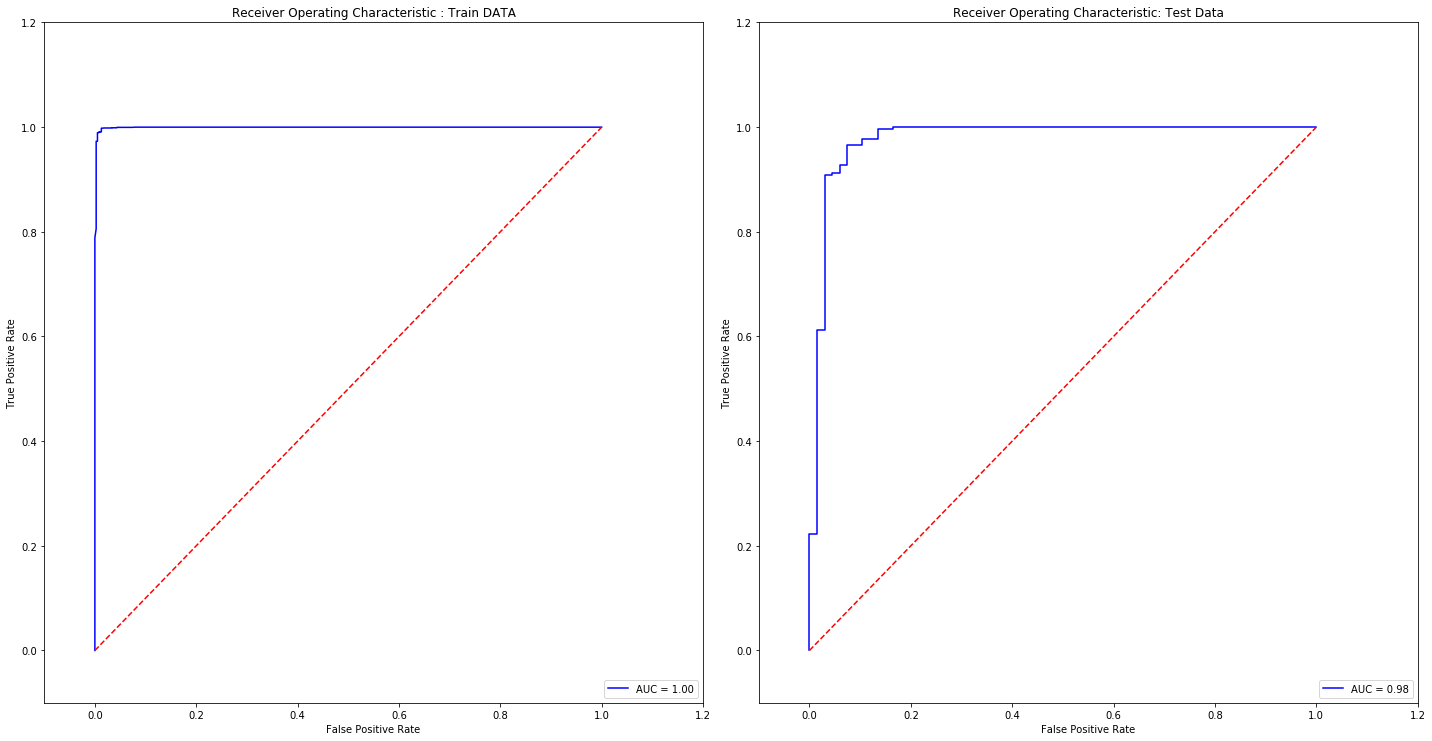

In [25]:
#AUC Score on Train Data
fig = plt.figure(figsize = (20,20)) 
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)
actual_train = y_train
predictions_train =pred_y_0_train0
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual_train, predictions_train)
roc_auc_val = auc(false_positive_rate, true_positive_rate)
ax1.set_title('Receiver Operating Characteristic : Train DATA')
ax1.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc_val)
ax1.legend(loc='lower right')
ax1.plot([0,1],[0,1],'r--')
ax1.set_xlim([-0.1,1.2])
ax1.set_ylim([-0.1,1.2])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

#AUC Score on Validation Data
actual_test = y_test
predictions_test =pred_y_0_test0
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual_test, predictions_test)
roc_auc_test = auc(false_positive_rate, true_positive_rate)
ax2.set_title('Receiver Operating Characteristic: Test Data')
ax2.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc_test)
ax2.legend(loc='lower right')
ax2.plot([0,1],[0,1],'r--')
ax2.set_xlim([-0.1,1.2])
ax2.set_ylim([-0.1,1.2])
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

#### Lets Build Same Model With Cross Validation (KFold=5) and see Accuracy and Auc Score 

In [26]:
cv = KFold(5, random_state = 42)
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
AUC = []

In [27]:
#build Model with Unbalanced Data with Cross validation
lr = LogisticRegression()
param_grid = {'C': [0.5, 1, 5, 10]}
grid1 = GridSearchCV(lr, param_grid, cv=cv).fit(X_train, y_train)
print("Grid Logistic Regression: ", grid1.best_score_, grid1.best_params_)

Grid Logistic Regression:  0.9698407319552694 {'C': 0.5}


In [28]:
#Train Model with Unbalanced Data with Cross validation

clf = grid1.best_estimator_
Model.append("Unbalanced Training Data with CV")
Accuracy.append(cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, X_train, y_train, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, X_train, y_train, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc').mean())


In [29]:
#Test Model with Unbalanced Data with Cross Validation

Model.append("Unbalanced Testing Data with CV")
Accuracy.append(cross_val_score(clf, X_test, y_test, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, X_test, y_test, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, X_test, y_test, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, X_test, y_test, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, X_test, y_test, cv=cv, scoring='roc_auc').mean())


In [30]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
#Under/Down Random-Sampling:
# Lets shuffle the data before creating the subsamples

print(data.columns)
data = data.sample(frac=1)
print(data['target'].value_counts())


# count of Ads classes 459 rows.
no_ad_data = data.loc[data['target'] == 1][:459]
ad_data = data.loc[data['target'] == 0]

normal_distributed_data = pd.concat([no_ad_data,ad_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)

#new_data.columns
print(new_data['target'].value_counts())


Index(['height',  'width',  'ratio',  'local',        4,        5,        6,
              7,        8,        9,
       ...
           1549,     1550,     1551,     1552,     1553,     1554,     1555,
           1556,     1557, 'target'],
      dtype='object', length=1559)
1    2820
0     459
Name: target, dtype: int64
1    459
0    459
Name: target, dtype: int64


### Under Sampling

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: target, dtype: float64


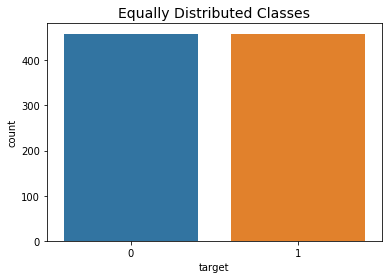

[0 1]
TEST GROUP
Size: 92
No ads percentage: 0.5543478260869565
ads percentage: 0.44565217391304346

TRAIN GROUP
Size: 826
No ads percentage: 0.4939467312348668
Ads percentage: 0.5060532687651331


C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [31]:
#Under/Down Random-Sampling:
    
new_data.head()
print('Distribution of the Classes in the subsample dataset')
print(new_data['target'].value_counts()/len(new_data))

sns.countplot('target', data=new_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

x1 = new_data[data.columns[:-1]]

#Using Statnderd scaler to standardise the new data
scaler = StandardScaler().fit(x1)
x1_scaled = scaler.transform(x1)
y1=new_data['target']
print(y1.unique())

X_train1, X_test1, y_train1, y_test1=train_test_split(x1_scaled, y1, test_size=0.1, random_state=42);

# Class balance in test group
print("TEST GROUP")
print('Size:',y_test1.count())
print("No ads percentage:",
      y_test1.value_counts()[1]/y_test1.count())
print("ads percentage:",
      y_test1.value_counts()[0]/y_test1.count())

# Class balance in train group
print("\nTRAIN GROUP")
print('Size:',y_train1.count())
print("No ads percentage:",
      y_train1.value_counts()[1]/y_train1.count())
print("Ads percentage:",
      y_train1.value_counts()[0]/y_train1.count())


In [32]:
lr = LogisticRegression()
param_grid = {'C': [0.5, 1, 5, 10]}
grid2 = GridSearchCV(lr, param_grid, cv=cv).fit(X_train1, y_train1)
print("Grid Logistic Regression: ", grid2.best_score_, grid2.best_params_)

Grid Logistic Regression:  0.9200968523002422 {'C': 0.5}


In [33]:
#Under Sampled Training of Data
clf1 = grid2.best_estimator_
Model.append("Balanced Down Sampled Training Data")
Accuracy.append(cross_val_score(clf1, X_train1, y_train1, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf1, X_train1, y_train1, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf1, X_train1, y_train1, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf1, X_train1, y_train1, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf1, X_train1, y_train1, cv=cv, scoring='roc_auc').mean())


In [34]:
#Under Sampled Testing of Data
Model.append("Balanced Down Sampled Testing Data")
Accuracy.append(cross_val_score(clf1, X_test1, y_test1, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf1, X_test1, y_test1, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf1, X_test1, y_test1, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf1, X_test1, y_test1, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf1, X_test1, y_test1, cv=cv, scoring='roc_auc').mean())


### Up-sampling Using SMOTE

In [35]:
# Separate majority class "1" and minority classes "0" resepectively.
#As you can see, the new DataFrame has more observations than the original
#, and the ratio of the two classes is now 1:1

df_majority = data[data.target==1]
df_minority = data[data.target==0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2820,    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    
# Display new class counts
df_upsampled.target.value_counts()

1    2820
0    2820
Name: target, dtype: int64

Distribution of the Classes in the upsampled dataset
1    0.5
0    0.5
Name: target, dtype: float64


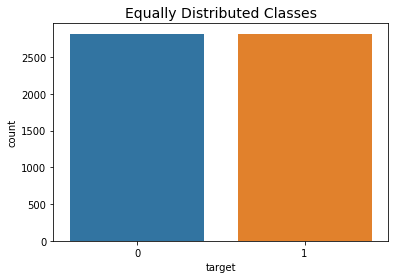

C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vinayak\Anaconda2.7\envs\py36\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


[1 0]
TEST GROUP
Size: 564
No ads percentage: 0.5212765957446809
ads percentage: 0.4787234042553192

TRAIN GROUP
Size: 5076
No ads percentage: 0.49763593380614657
Ads percentage: 0.5023640661938534


In [36]:
#Up-Sampling:
    
df_upsampled.head()
print('Distribution of the Classes in the upsampled dataset')
print(df_upsampled['target'].value_counts()/len(df_upsampled))

sns.countplot('target', data=df_upsampled)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

x2 = df_upsampled[data.columns[:-1]]

#Using Statnderd scaler to standardise the new data
scaler = StandardScaler().fit(x2)
x2_scaled = scaler.transform(x2)
y2=df_upsampled['target']
print(y2.unique())

X_train2, X_test2, y_train2, y_test2=train_test_split(x2_scaled, y2, test_size=0.1, random_state=42);

# Class balance in test group
print("TEST GROUP")
print('Size:',y_test2.count())
print("No ads percentage:",
      y_test2.value_counts()[1]/y_test2.count())
print("ads percentage:",
      y_test2.value_counts()[0]/y_test2.count())

# Class balance in train group
print("\nTRAIN GROUP")
print('Size:',y_train2.count())
print("No ads percentage:",
      y_train2.value_counts()[1]/y_train2.count())
print("Ads percentage:",
      y_train2.value_counts()[0]/y_train2.count())


In [37]:
sm = SMOTE(random_state=42, ratio = 1.0)
X_train_res1, y_train_res1 = sm.fit_sample(X_train2, y_train2);


lr = LogisticRegression()
param_grid = {'C': [0.5, 1, 5, 10]}
grid3 = GridSearchCV(lr, param_grid, cv=cv).fit(X_train_res1, y_train_res1)
print("Grid Upsampled Logistic Regression: ", grid3.best_score_, grid3.best_params_)

clf2 = grid3.best_estimator_
clf2.fit(X_train_res1, y_train_res1)

Model.append("Balanced Up-Sampled Training Data")
Accuracy.append(cross_val_score(clf2, X_train_res1, y_train_res1, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf2, X_train_res1, y_train_res1, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf2, X_train_res1, y_train_res1, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf2, X_train_res1, y_train_res1, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf2, X_train_res1, y_train_res1, cv=cv, scoring='roc_auc').mean())

Model.append("Balanced Up-Sampled Testing Data")
Accuracy.append(cross_val_score(clf2, X_test2, y_test2, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf2, X_test2, y_test2, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf2, X_test2, y_test2, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf2, X_test2, y_test2, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf2, X_test2, y_test2, cv=cv, scoring='roc_auc').mean())

Grid Upsampled Logistic Regression:  0.9823529411764705 {'C': 0.5}


## Evaluate the Results

In [38]:
evaluation = pd.DataFrame({'Model - Logistic Regression': Model, 
                           'Accuracy': Accuracy, 
                           'Precision': Precision, 
                           'Recall': Recall,
                           'F1 Score': F1, 
                           'AUC': AUC})
print("FOLLOWING ARE THE TRAINING & TESTING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model - Logistic Regression,Accuracy,Precision,Recall,F1 Score,AUC
0,Unbalanced Training Data with CV,0.969841,0.981667,0.983587,0.982624,0.978826
1,Unbalanced Testing Data with CV,0.804988,0.957660,0.789441,0.865258,0.924146
2,Balanced Down Sampled Training Data,0.920117,0.901411,0.937570,0.918870,0.974084
3,Balanced Down Sampled Testing Data,0.868421,0.849945,0.919192,0.876766,0.914395
4,Balanced Up-Sampled Training Data,0.982353,0.991589,0.973014,0.982190,0.996710
5,Balanced Up-Sampled Testing Data,0.934418,0.915866,0.962735,0.937470,0.974488


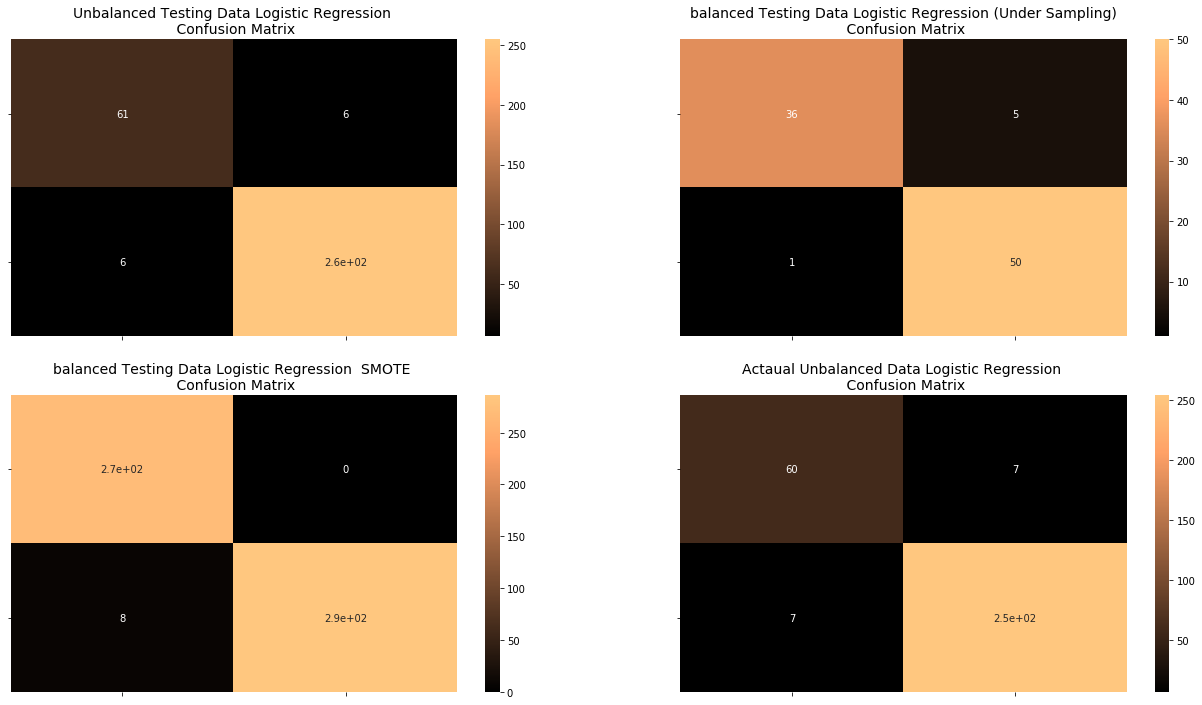

In [39]:


#Unbalanced Testing Data Logistic Regression
y_pred_log_reg = clf.predict(X_test);

#balanced Under-Sampled Testing Data Logistic Regression
y_pred_log_reg1 = clf1.predict(X_test1)

#Logistic Regression fitted using SMOTE Over-sampling technique OverSampling
y_pred_log_reg2 = clf2.predict(X_test2)

# UnBalanced Origianl data Logistic Regression fitted using  technique
y_pred_log_reg3=clf_0.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
log_reg_cf1=confusion_matrix(y_test1, y_pred_log_reg1)
log_reg_cf2=confusion_matrix(y_test2, y_pred_log_reg2)
log_reg_cf3=confusion_matrix(y_test, y_pred_log_reg3)


fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Unbalanced Testing Data Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(log_reg_cf1, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("balanced Testing Data Logistic Regression (Under Sampling)\n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(log_reg_cf2, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("balanced Testing Data Logistic Regression  SMOTE \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(log_reg_cf3, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Actaual Unbalanced Data Logistic Regression \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()
